Simulating Treatment Effects
===

This notebook intends to guide the reader through the process of simulating data with treatment effects from the perspective of the Rubin Causal Model[$^1$](https://en.wikipedia.org/wiki/Rubin_causal_model)[$^2$](http://www.biostat.jhsph.edu/~dscharf/Causal/rubin.journ.psych.ed.pdf)(Potential Outcomes Framework). 

Simulating treatment effect data has many applications including: 

1. Evaluating the effectiveness of new and exisiting models in estimating treatment effects. 
2. Providing an explanation of treatment effects from the perspective of the [data generating process](https://stats.stackexchange.com/questions/7836/in-regression-analysis-whats-the-difference-between-data-generation-process-and)
3. Illustrating where bias occurs when model assumptions are invalid


The rest of the notebook is as follows. First, I start with a brief overview of the potential outcomes framework as it relates to estimating treatment effects. Next, I introduce the concept the data generating process (DGP) and include code to illustrate a simple example for both continuous and discrete data. After that, I'll expand the initial DGP to include a population constant effect, followed by an independent hetergenous effect, and finally a correlated hetergenous effect. 

At each stage, I encourage the user to fit traditional statistical and machine learning models to the generated data. Explore how different variations in the DGP can influence the performance of these models. Experiment with different sample sizes, feature structures, variable weights, and error structures to understand the impact of each piece on the performance of your tools of choice. 

## A Brief Overview of the Potential Outcomes Framework

</br>
</br>
</br>
</br>

## Data Generating Process (DGP)

In econometrics, we are taught to think of the world as a giant laboratory that is full of various mechanism that generate the data we look at. Put it another way, everything we are interested in studying is the realization of some stochastic process. 

Our job as data scientists is to build models that characterize these processes mathematically. We do this by specifying how we believe these processes work in mathematical equations. The mathematical represenation of our belief about how the stochastic process of interest works is called a model. 

By taking a DGP-first perspective to learning, what we're doing is creating our own stochastic process where we know the precise mathematical details of this process. We can add as much or as little complexity to the process as we want and we observe different realizations of our process through monte carlo simulations. We pair this with model development to answer the question: "If the true DGP is this, how well does our proposed model actually characterize the process?". 

In addition to proving model validity to ourselves via theory and mathematical proofs, we can use this tool to empirically validate that our models accurately capture the process.

### Exogenenity and Endogeneity

[Exogeneity](https://en.wikipedia.org/wiki/Exogeny) and [Endogeniety](https://en.wikipedia.org/wiki/Endogeneity) are two of the key concepts of econometrics implicitly illustrated by a DGP-approach. 

Exogenenous variables are only influenced by other processes outside the model and unrelated to other parts of the model. Exogenous variables are also known as independent variables in statistics or features in machine learning. Most importantly, exogenous variables are independent(uncorrelated) with the error term. Another way to think about it is they should be completely unrelated to all other forces in nature that impact the random process. 

We create exogenous variables by drawing from a random distribution. Since these variables are drown at random, we can guarantee in our DGP, they are exogenous to all other forces that affect our predictor variable. 

Endogenous variables are variables that are explained by forces inside the model. The most common endogenous variable is the dependent variable (i.e., outcome, label, etc...). When we build a DGP, we are actually generating an outcome variable as a function of a process, guaranteeing it is endogenous. This is good endogeneity. 

Bad endogeneity, the bain (or pleasure depending on who you are) of all modelers is when the supposedly exogenous predictor variables are actually correlated with some unobserved variable that is captured by the error term. In this case, there is something in this world that influences both X and Y. This leads to biased estimates of the impact of X on Y and diminishes the accuracy of our measurement of causality.

The DGP-first approach allows us to create endogenous predictor variables by injecting correlation between the independent variables and the error term. That is beyond the scope of this tutorial, but it is an extremely worth exercise on your path to really understand causal inference from less than pure experimental data.

### Continous Outcomes

The easeist way to think about the DGP for continous variables is in the form of linear regression. Let's assume our variable of interest follows a normal distribution with mean $\mu$ and standard deviation $\sigma^2$. 

$$ Y = \mathcal{N}(\mu, \sigma^2) $$

If $Y$ is heterogenous in our population and partially explained by a the vector $\mathbf{X}$, we can write our regression equation as follows: 

$$ y_i = \beta_0 + \beta_1 x_1 + \cdots + \beta_j x_j + \varepsilon_i $$

where $\varepsilon$~$\mathcal{N}(0, \sigma^2)$

If we design our DGP to follow this functional form, we need to do the following: 

1. Specify the number of $x$ variables to include
2. Draw a value for each $x$ for each person from an indepdendent distribution
3. Specify a vector of constants for $beta$ of length $J + 1$
4. Draw $\varepsilon_i$ for each person from $\mathcal{N}(0, \sigma^2)$
5. Compute $y_i$ for each observation

Let's look at this in code below using Numpy.

In [1]:
import numpy as np
# Specify number of observations
num_obs = 1000

# Specify Number of Features
num_x = 3

# Generate Independent draws from a uniform distribution for all X's
x_mat = np.random.random(size=(num_obs, num_x))

# Specify our coefficient vector
beta = [1, -2, 3, -.8]

# Generate our error term
epsilon_vector = np.random.normal(size=(num_obs), loc=0, scale=1)

# Compute y_i
y_vec = beta[0] + np.dot(x_mat, beta[1:]) + epsilon_vector

Now that we've executed the DGP, let's plot $y_i$ to get a sense of what the distribution looks like.

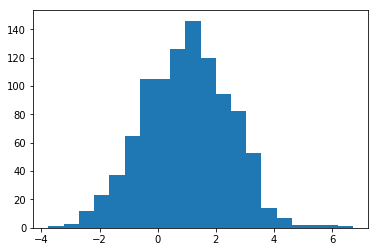

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y_vec, bins=20);

We can also visualize the relationship between our random X variables and our generated Y variable.

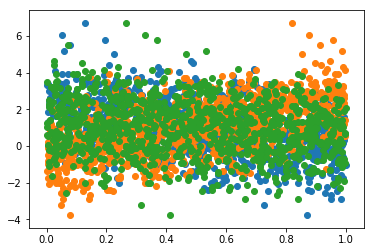

In [3]:
plt.scatter(x_mat[:, 0], y_vec);
plt.scatter(x_mat[:, 1], y_vec);
plt.scatter(x_mat[:, 2], y_vec);

#### Next Steps
Before moving on, there are a few logical steps you can take to maximize learning. 

1. Fit a linear regression using your `x_mat` to predict your `y_vec`. You should recover the coefficients specified in the `beta` vector. 
2. Change the coefficient values in the `beta` vector. Re-run descriptive analysis and regressions to see what happens. 
3. Change the distributions and scales of your X variables. Re-run descriptives and regressions to see what happens.
4. Change the distribution of the error term. Re-run your regression. Do you see anything funny compared to what you should expect?
5. Change the scale parameter in the error ($\sigma^2$). What happens to your estimates? If you add more or less data (`NOBS`) do your results change?
6. Run a regression using only a subset of your X variables. What happens to $R^2$? How well do you recover coefficients?
7. Remove the error term and re-run the regression. Pretty good model fit, eh? (Deterministic processes are nice, but not real)

All of these are Empirical experiments. In each case, you're changining the underlying properties of the DGP and evaluating how well your model (regression) does in characterizing the stochastic process you created.

### Binary Outcomes

Discrete variables are a bit more difficult to simulate because we work from a perspective that $y_i$ is observed to be 1 or 0, but that is really a manifestiation of a latent $y^{\prime}_i$. The DGP-first approach to generating discrete data follows this pattern: 

$$y_i = \begin{cases} 1 & \beta_0 + \beta_1 x_1 + \cdots + \beta_j x_j + \varepsilon_i > 0 \\ 0 & \text{else} \end{cases}$$

where $\varepsilon$ is an error distributed by the standard [logistic distribution](https://en.wikipedia.org/wiki/Logistic_distribution)

If we design our DGP to follow this functional form, we need to do the following: 

1. Specify the number of $x$ variables to include
2. Draw a value for each $x$ for each person from an indepdendent distribution
3. Specify a vector of constants for $beta$ of length $J + 1$
4. Draw $\varepsilon_i$ for each person from $Logi(0, s)$
5. Compute $y_i$ for each observation
6. If $y_i > 0$ Then $1$, else $0$

Let's look at this in code below using Numpy.


In [4]:
# Specify number of observations
num_obs = 1000

# Specify Number of Features
num_x = 3

# Generate Independent draws from a uniform distribution for all X's
x_mat = np.random.random(size=(num_obs, num_x))

# Specify our coefficient vector
beta = [-3, -8, 13, -8]

# Generate our error term
epsilon_vector = np.random.logistic(size=(num_obs), loc=0, scale=1)

# Compute y_i
y_vec = (beta[0] + np.dot(x_mat, beta[1:]) + epsilon_vector) > 0

In [5]:
# How balanced is our data?
y_vec.mean()

0.22

#### Next Steps
Before moving on, there are a few logical steps you can take to maximize learning. 

1. Do descriptive analysis on the data. How to visualization techniques help you unpack the relationship between x and y?
2. Fit a logistic regression to the data (don't forget to include an intercept [column of 1's])
3. Change the balance of 1/0 by increasing or decreasing the intercept variable. How does the balance of outcomes impact your ability to find the relationships?
4. Generate two sets of data using the same parameters. Train a model on one data set and test it on the second data set. How does the fit statistics change? 
5. Don't use all the X's to fit a model. Which X's can you afford to drop (as it relates to coefficient vector) and still maintain reasonable model fit?

## Constant Treatment Effects

Now that we know how to generate data for the two primary types of data we deal with (continuous and binary), let's start thinking about treatment effects. Importantly, we want to understand what kind of treatment effect we want to simulate (or expect to observe in reality). 

To start with, we're going to assume a population constant treatment effect. Under this assumption, all users in our population, regardless of their individual characteristics, are affected in the exact same way by our hypothetitcal treatment. This is the assumption when we conduct a simple A/B experiment and we compare the means of our two groups. We are testing the hypothesis that, in general, there is a fixed difference in the means between persons in group A and persons in group B.

This is a strong assumption, but makes generating data very straight forward. Adding a constant treatment effect is equivalent to adding a constant to either primary equation above when the person receives the treatment. 

$$y_i = \beta_0 + \beta_1 x_1 + \cdots + \beta_j x_j + \tau W_i  + \varepsilon_i$$

Where: $W_i = \begin{cases} 1 & \text{Treatment} \\ 0 & \text{Control} \end{cases}$ and $\tau$ is the population constant treatment effect. 

### Binary Outcomes
*To decrease the length of the notebook, I'm only going to deal with a single type of DGP moving forward. The same intuition can be applied to the other process to achieve similar learnings*

If we want to add a treatment effect to a binary outcome, we need to add two more steps to our data generating algorithm.


1. Specify the number of $x$ variables to include
2. Draw a value for each $x$ for each person from an indepdendent distribution
3. Specify a vector of constants for $beta$ of length $J + 1$
4. Draw $\varepsilon_i$ for each person from $Logi(0, s)$
5. **Randomly assign users to treatment with some probability $p$**
6. **Define population constant treatment effect $\tau$**
5. Compute $y_i$ for each observation
6. If $y_i > 0$ Then $1$, else $0$


In [6]:
# Specify number of observations
num_obs = 1000

# Specify Number of Features
num_x = 3

# Generate Independent draws from a uniform distribution for all X's
x_mat = np.random.random(size=(num_obs, num_x))

# Specify our coefficient vector
beta = [-3, -8, 13, -8]

# Generate our error term
epsilon_vector = np.random.logistic(size=(num_obs), loc=0, scale=1)

# Assign to treatment Group
trt_assign = np.random.binomial(1, .5, size=(num_obs))

# Define Treatment Effect
tau = 3

# Compute y_i
y_vec = (beta[0] + np.dot(x_mat, beta[1:]) + trt_assign*tau + epsilon_vector) > 0

In [7]:
# Population Incidence Rate
y_vec.mean()

0.314

In [8]:
# Incidence Rate by Treatment Group
y_vec[np.where(trt_assign == 1)].mean(), y_vec[np.where(trt_assign == 0)].mean()

(0.39468690702087289, 0.22410147991543342)

Since we assigned our treatment randomly (independent of customer characteristics), and we know we have a constant treatment effect, we can actually measure the effectiveness of our treatment using simple logistic regression. 

Even if we drop one of the X variables, we should still recover an unbiased estimate of our treatment effect. If you don't believe me, try on your own to see what happens. 

#### Next Steps:

Run many empirical experiments with this data to learn what statistical tests and models actually provide you with insights you know to be true (because you know exactly how the data is generated!). 

1. Run a $\chi^2$ test to see if the two groups are different
2. Fit a logistic regression including the treatment assignment as a dummy variable
3. Compute the lift you get from applying the treatment
4. Compute what would have happened to the population incidence rate had the treatment been applied globablly
5. Change the size of the treatment effect relative to the coefficients. What happens when you make it bigger/smaller? 

## Independent Heterogenous Treatment Effects

Now that you have a better understanding of how population constant treatment effects work, let's relax the strict assumption that the treatment affects everyone identically. 

Notationally, we're just going to change $\tau$ to $\tau_i$. Mathematically, we need to think about more about $\tau_i$. Specifically, we need to make an assumption about the shape of the distribution that $\tau_i$ comes from. For simplicity, I'm going to assume that $\tau_i$~$\mathcal{N}(\tau, \sigma^2)$. Then $E[\tau_i] = \tau$. In other words, we're going to assume that treatment effects follow a normal distribution with a mean equal to the population average treatment effect.

Let's update our data generating algorithm to account for our relaxed assumption. 

1. Specify the number of $x$ variables to include
2. Draw a value for each $x$ for each person from an indepdendent distribution
3. Specify a vector of constants for $beta$ of length $J + 1$
4. Draw $\varepsilon_i$ for each person from $Logi(0, s)$
5. Randomly assign users to treatment with some probability $p$
6. Define population average treatment effect $\tau$ and standard deviation ($\sigma^2$)
7. Draw $\tau_i$ for each person from $\mathcal{N}(\tau, \sigma^2)$
5. Compute $y_i$ for each observation
6. If $y_i > 0$ Then $1$, else $0$

In [9]:
# Specify number of observations
num_obs = 1000

# Specify Number of Features
num_x = 3

# Generate Independent draws from a uniform distribution for all X's
x_mat = np.random.random(size=(num_obs, num_x))

# Specify our coefficient vector
beta = [-3, -8, 13, -8]

# Generate our error term
epsilon_vector = np.random.logistic(size=(num_obs), loc=0, scale=1)

# Assign to treatment Group
trt_assign = np.random.binomial(1, .5, size=(num_obs))

# Define Population Average Treatment Effect
tau = 3

# Draw Individual Treatment Effect
tau_vec = np.random.normal(loc=tau, scale=1, size=(1000,))

# Compute y_i
y_vec = (beta[0] + np.dot(x_mat, beta[1:]) + (trt_assign * tau_vec) + epsilon_vector) > 0

In [10]:
# Incidence Rate by Treatment Group
y_vec[np.where(trt_assign == 1)].mean(), y_vec[np.where(trt_assign == 0)].mean()

(0.41050583657587547, 0.17489711934156379)

** IMPORTANT **

Before we move on, let's discuss our treatment effect a bit. By drawing our effect from a normal distribution with mean $\tau$, we're effectively making the treatment effect independent of all sources. This is important in the context of response (uplift) models because the primary assumption is that the treatment effect is heterogenous and explainable by some set of observable variables. If this assumption is not true, the reponse models cannot work because the treatment effect is completely exogenous and there is no possible variable that can explain why the treatment effect is what it is for that person. 

If you use this specific data to fit an Uplift model, you should get non-informative results! (*Hint: Try this exact test*)

### A DGP Approach for $\tau_i$

By this point, if you should have an idea of how we're going to generate endogenous treatment effects that are theoretically recoverable by an uplift model. We need to apply the same process that we used to generate continous data to generate our $\tau_i$. 

Our DGP follows this form: 

$$y_i = \begin{cases} 1 & \beta_0 + \beta_1 x_1 + \cdots + \beta_j x_j + \tau_i W_i + \varepsilon_i > 0 \\ 0 & \text{else} \end{cases}$$

and 

$$\tau_i = \zeta_0 + \zeta_1 z_1 + \cdots + \zeta_h z_h + \epsilon_i$$

where $\epsilon$~$\mathcal{N}(0, \varsigma^2)$

We maintain or independence assumptions by drawing our $z$ variables from indpendent variables and ensure that $x$ does not enter the equation for $\tau$ and that $z$ does not enter the equation for $y_i$ except through it's influence on $\tau_i$

Let's update our data generating algorithm accordingly: 

1. Specify the number of $x$ variables, $J$, to include
2. Draw a value for each $x$ for each person from an indepdendent distribution
3. Specify a vector of constants for $beta$ of length $J + 1$
4. Draw $\varepsilon_i$ for each person from $Logi(0, s)$
5. Randomly assign users to treatment with some probability $p$
6. Specify the number of $z$ variables, $H$, to include
7. Draw a value for each $z$ for each person from an independent distribution
8. Specify a vector of constants for $zeta$ of length $H + 1$
9. Draw $\epsilon_i$ for each person from $\mathcal{N}(0, \varsigma^2)$
10. Compute $\tau_i$ for each observation
11. Compute $y_i$ for each observation
12. If $y_i > 0$ Then $1$, else $0$


In [11]:
# Specify number of observations
num_obs = 1000

# Specify Number of Features
num_x = 3

# Generate Independent draws from a uniform distribution for all X's
x_mat = np.random.random(size=(num_obs, num_x))

# Specify our coefficient vector
beta = [-3, -8, 13, -8]

# Generate our error term
epsilon_vector = np.random.logistic(size=(num_obs), loc=0, scale=1)

# Assign to treatment Group
trt_assign = np.random.binomial(1, .5, size=(num_obs))

# Specify number of z variables
num_z = 3

# Generation Independent draws from a uniform distribution for all Z's
z_mat = np.random.random(size=(num_obs, num_z))

# Specify treatment specific coefficient vector
zeta = [2, 1, -3, -2]

# Generate treatment specific error term
tau_error = np.random.normal(size=(num_obs))

# Compute Treatment Effect
tau_vec = zeta[0] + np.dot(z_mat, zeta[1:]) + tau_error

# Compute y_i
y_vec = (beta[0] + np.dot(x_mat, beta[1:]) + (trt_assign * tau_vec) + epsilon_vector) > 0

In [12]:
# Incidence Rate by Treatment Group
y_vec[np.where(trt_assign == 1)].mean(), y_vec[np.where(trt_assign == 0)].mean()

(0.20235756385068762, 0.22403258655804481)

In [13]:
tau_vec.mean()

-0.023431942485535543

### Studying Uplift Models

Now you have everything you need to simulate data for uplift models! If you've followed along and understand the math behind what is in the notebook and have a better understanding of how the data generation process works as it relates to models, you should be able to fit an initial set of models to explore peformance. As you run empirical experiments, take time to really think about what should happen when you pull the various levers in the DGP. Are you getting results that you expect? How do results you see match with the *truth* you construct?

#### Next Steps

1. Simulate two data sets with same process, train an  uplift model on 1, validate it on 2. Compute the MSE of esitmated treatment effect compared to your true treatment effect. How does this result compare to standard evaluation metrics?
2. Include only the X variables as features in your Uplift model. How well does this perform? Why?
3. Include only the Z variables as features in your Uplift model. How well does this perform? Why?
4. How well do standard statistical models capture the treatment effect?
5. What happens when the size of the treatment effect decreases (shrink all your $\zeta$ values)? Can you still get strong model fit (MSE of $\tau_i$ to $\widehat{\tau_i}$)
6. What happens as you increase the number of $z$ variables that explain the treatment effect? 
7. What happens as you increase the size of $\epsilon_i$ (adding unexplainable varaiance)?
8. What happens as you decrease the size of $\epsilon_i$?
9. How does the performance of the uplift model vary as you change characteristics of the DGP? (Changing these characteristics is analogous to the question of "what assumptions do you need to hold true for this model to be useful?")

## Correlated Heterogenous Treatment Effects

A key assumption of the independent heterogenous response data is that individual variables the explain the response to the treatment are completely independent of the variables the explain the baseline performance of the person. This is a very strong assumption and for this to work in practice, we will have to believe there is a set of features that explain the response to a treatment that have no impact whatsoever on baseline performance. This is most likely completely untrue and too strong of an assumption to make for these models. 

What we need to do is answer the question as to what happens when the same variable can explain both the response to treatement and the baseline conversion rate. The extreme case is that the exact same varaibles that influence baseline also influence reponse, but have a different weight. 

You can generate this data quickly by re-using the X Matrix you generate above to compute $\tau_i$. 

$$\tau_i = \zeta_0 + \zeta_1 x_1 + \cdots + \zeta_j x_j + \epsilon_i$$

You could also make an assumption that there are some independent $z$ variables that affect only $\tau_i$ and not $E[y_i | W_i = 0]$

$$\tau_i = \zeta_0 + \zeta_1 z_1 + \cdots + \zeta_h z_h + \zeta_j x_j  + \epsilon_i$$

#### Next Steps

Make these slight modifications to your DGP and see what happens!

1. What happens to model performance?
2. Do these models still work?
3. Does the feasibility of these models still hold? 
4. Do you need to make any caveats when using these?
5. If you used the results of a single model to personalize the treatment/no treatment decision for each person, how much of the total treatment effect could you capture? Can you increase the $\sum{t_i}$ to higher than when you just applied a single treatment across the board (either treat everyone or treat no one)?